<a href="https://colab.research.google.com/github/ajag408/PokerClass/blob/main/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#use this to mount your drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
#  %cd into /content/drive/Shared\ drives/255Project/PokerClass   (u have to use % in front of command)

%cd Shared\ drives/255Project/PokerClass

#when saving changes, click on File -> Save a copy in GitHub.  Repo is "ajag408/PokerClass" and branch is "main"

/content/drive/Shared drives/255Project/PokerClass


In [13]:
#proposing switching training and test sets, since test is way larger

import pandas as pd

train = pd.read_csv('./Data/poker-hand-testing.data', delimiter=",")
train.columns = ['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'CLASS']
print(train)

        S1  C1  S2  C2  S3  C3  S4  C4  S5  C5  CLASS
0        3  12   3   2   3  11   4   5   2   5      1
1        1   9   4   6   1   4   3   2   3   9      1
2        1   4   3  13   2  13   2   1   3   6      1
3        3  10   2   7   1   2   2  11   4   9      0
4        1   3   4   5   3   4   1  12   4   6      0
...     ..  ..  ..  ..  ..  ..  ..  ..  ..  ..    ...
999994   3   1   1  12   2   9   4   9   2   6      1
999995   3   3   4   5   2   7   1   4   4   3      1
999996   1  11   4   7   3   9   1  13   2   7      1
999997   3  11   1   8   1   1   3  13   2   8      1
999998   2   5   2   9   4   9   2   3   3   3      2

[999999 rows x 11 columns]


In [14]:
test = pd.read_csv('./Data/poker-hand-training-true.data', delimiter=",")
test.columns = ['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'CLASS']
print(test)

       S1  C1  S2  C2  S3  C3  S4  C4  S5  C5  CLASS
0       2  11   2  13   2  10   2  12   2   1      9
1       3  12   3  11   3  13   3  10   3   1      9
2       4  10   4  11   4   1   4  13   4  12      9
3       4   1   4  13   4  12   4  11   4  10      9
4       1   2   1   4   1   5   1   3   1   6      8
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..    ...
25004   3   9   2   6   4  11   4  12   2   4      0
25005   4   1   4  10   3  13   3   4   1  10      1
25006   2   1   2  10   4   4   4   1   4  13      1
25007   2  12   4   3   1  10   1  12   4   9      1
25008   1   7   3  11   3   3   4   8   3   7      1

[25009 rows x 11 columns]


In [15]:
#preprocessing, do same thing on each set separately

# check missing values

train.isnull().any().any()

test.isnull().any().any()

False

In [16]:
#check if any attributes have zero variance across instances (same value in all samples, these should therefore
#be considered meaningless)

from sklearn import feature_selection
print("training")
print(train.shape)
sel = feature_selection.VarianceThreshold()
train_variance = sel.fit_transform(train)

train = pd.DataFrame(train_variance)
print(train.shape)

print('\n')
print("testing")
print(test.shape)

test_variance = sel.fit_transform(test)

test = pd.DataFrame(test_variance)
print(test.shape)



training
(999999, 11)
(999999, 11)


testing
(25009, 11)
(25009, 11)


In [19]:
# correlation of features to image class
corr_matrix = train.corr().abs()
print(corr_matrix[10].sort_values(ascending=False))

10    1.000000
1     0.003876
7     0.003010
5     0.002482
3     0.001712
9     0.001604
8     0.001515
4     0.001194
6     0.001157
2     0.000196
0     0.000030
Name: 10, dtype: float64


All features seem to have very low corelation to target

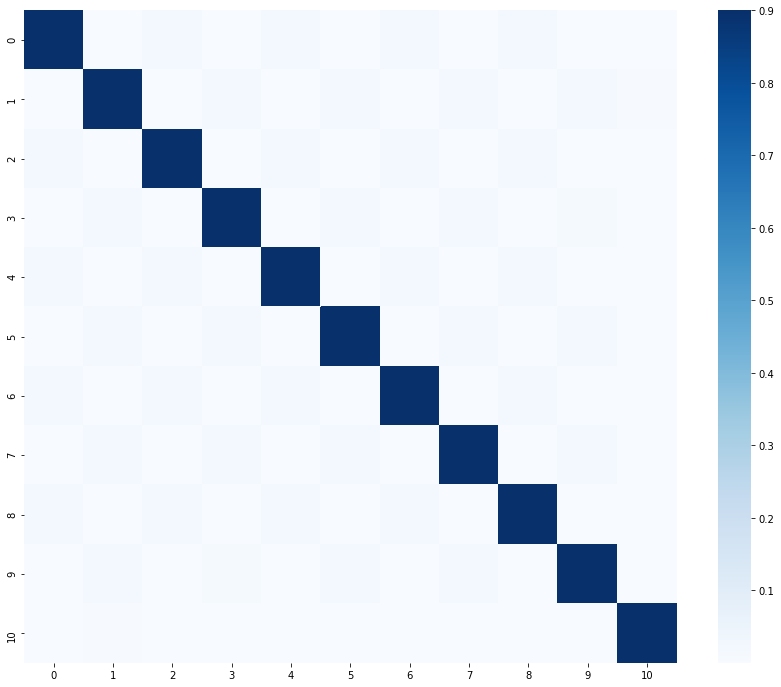

In [20]:
#visualize correlation
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = train.corr().abs()
plt.subplots(figsize=(15,12))
sns.heatmap(corr_matrix, vmax=0.9, cmap="Blues", square=True)

In [25]:
#check distribution of data

X_train = train.iloc[:,:10].copy()
X_test = test.iloc[:,:10].copy()

for col in X_train:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(X_train[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(X_train[col].kurt())  
         )

              0 Skewness: -0.00     Kurtosis: -01.36
              1 Skewness: 00.00     Kurtosis: -01.22
              2 Skewness: -0.00     Kurtosis: -01.36
              3 Skewness: -0.00     Kurtosis: -01.22
              4 Skewness: -0.00     Kurtosis: -01.36
              5 Skewness: -0.00     Kurtosis: -01.21
              6 Skewness: -0.00     Kurtosis: -01.36
              7 Skewness: -0.00     Kurtosis: -01.21
              8 Skewness: 00.00     Kurtosis: -01.36
              9 Skewness: 00.00     Kurtosis: -01.21


In [29]:
#using StandardScaler for standardization since distribution seams approximately normal

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.fit_transform(X_test))

for col in X_train:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(X_train[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(X_train[col].kurt())  
         )

              0 Skewness: -0.00     Kurtosis: -01.36
              1 Skewness: 00.00     Kurtosis: -01.22
              2 Skewness: -0.00     Kurtosis: -01.36
              3 Skewness: -0.00     Kurtosis: -01.22
              4 Skewness: -0.00     Kurtosis: -01.36
              5 Skewness: -0.00     Kurtosis: -01.21
              6 Skewness: -0.00     Kurtosis: -01.36
              7 Skewness: -0.00     Kurtosis: -01.21
              8 Skewness: 00.00     Kurtosis: -01.36
              9 Skewness: 00.00     Kurtosis: -01.21
